# How are in-demand skills trending for Data Analysts?

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter DataFrame to include only Data Analyst jobs located in Poland
df_DA_PL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

# Extract the month number from 'job_posted_date' and add it as a new column 'job_posted_month_no'
df_DA_PL['job_posted_month_no'] = df_DA_PL['job_posted_date'].dt.month

# Expand the 'job_skills' list so each skill has its own row in the Data Analyst Poland data
df_DA_PL_explode = df_DA_PL.explode('job_skills')

In [ ]:
# Create a pivot table counting occurrences of each skill per month
df_DA_PL_pivot = df_DA_PL_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Add a 'Total' row summing counts for each skill across all months
df_DA_PL_pivot.loc['Total'] = df_DA_PL_pivot.sum()

# Reorder columns so skills with highest total counts come first
df_DA_PL_pivot = df_DA_PL_pivot[df_DA_PL_pivot.loc['Total'].sort_values(ascending=False).index]

# Remove the 'Total' row from the pivot table to keep only monthly data
df_DA_PL_pivot = df_DA_PL_pivot.drop('Total')

df_DA_PL_pivot  # Display the pivot table


job_skills,sql,excel,python,tableau,power bi,sap,r,azure,sas,vba,...,ibm cloud,redis,powerbi,pytorch,react.js,plotly,svn,vue,watson,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,233,183,122,114,102,52,52,52,34,32,...,1,1,0,0,0,0,0,0,0,0
2,210,141,124,87,92,52,53,33,44,42,...,0,0,0,0,0,0,0,0,0,0
3,168,144,106,84,73,30,40,28,40,29,...,0,0,0,0,0,1,0,1,0,0
4,132,102,76,72,60,32,23,21,8,24,...,0,0,0,0,0,0,0,0,0,0
5,134,96,87,48,46,25,25,25,4,17,...,0,0,0,0,0,0,0,0,0,0
6,89,90,56,40,43,28,23,4,16,16,...,0,0,0,0,0,0,0,0,0,0
7,127,106,86,63,51,32,21,12,20,18,...,0,0,0,0,0,0,0,0,0,0
8,152,119,75,42,68,42,24,26,32,12,...,0,0,1,0,1,0,0,0,1,0
9,71,48,47,30,21,15,14,12,6,7,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
# Count total number of Data Analyst job postings per month
DA_totals = df_DA_PL.groupby('job_posted_month_no').size()

In [ ]:
# Convert skill counts per month to percentages of total job postings that month
df_DA_PL_percent = df_DA_PL_pivot.div(DA_totals/100, axis=0)

In [39]:
#Convert Month No. to Month's Name
df_DA_PL_percent = df_DA_PL_percent.reset_index()
df_DA_PL_percent['job_posted_month'] = df_DA_PL_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_PL_percent = df_DA_PL_percent.set_index('job_posted_month')
df_DA_PL_percent = df_DA_PL_percent.drop(columns='job_posted_month_no')
df_DA_PL_percent

job_skills,sql,excel,python,tableau,power bi,sap,r,azure,sas,vba,...,ibm cloud,redis,powerbi,pytorch,react.js,plotly,svn,vue,watson,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
sty,46.138614,36.237624,24.158416,22.574257,20.198020,10.297030,10.297030,10.297030,6.732673,6.336634,...,0.19802,0.19802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lut,53.164557,35.696203,31.392405,22.025316,23.291139,13.164557,13.417722,8.354430,11.139241,10.632911,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mar,50.000000,42.857143,31.547619,25.000000,21.726190,8.928571,11.904762,8.333333,11.904762,8.630952,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.297619,0.000000,0.297619,0.000000,0.000000
kwi,46.643110,36.042403,26.855124,25.441696,21.201413,11.307420,8.127208,7.420495,2.826855,8.480565,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
maj,54.693878,39.183673,35.510204,19.591837,18.775510,10.204082,10.204082,10.204082,1.632653,6.938776,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cze,42.583732,43.062201,26.794258,19.138756,20.574163,13.397129,11.004785,1.913876,7.655502,7.655502,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lip,49.224806,41.085271,33.333333,24.418605,19.767442,12.403101,8.139535,4.651163,7.751938,6.976744,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sie,49.032258,38.387097,24.193548,13.548387,21.935484,13.548387,7.741935,8.387097,10.322581,3.870968,...,0.00000,0.00000,0.322581,0.000000,0.322581,0.000000,0.000000,0.000000,0.322581,0.000000
wrz,50.000000,33.802817,33.098592,21.126761,14.788732,10.563380,9.859155,8.450704,4.225352,4.929577,...,0.00000,0.00000,0.000000,0.704225,0.000000,0.000000,0.704225,0.000000,0.000000,0.704225


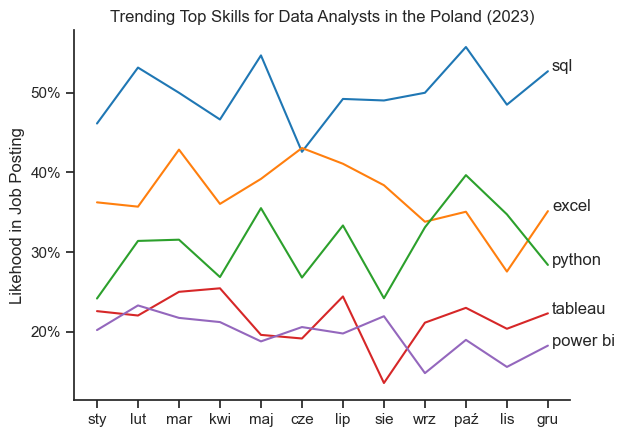

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_PL_percent.iloc[:,:5] # Select top 5 skills to plot

sns.lineplot(data=df_plot, dashes=False, palette='tab10', legend=False) # Plot skill trends over months
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the Poland (2023)')
plt.ylabel('Likehood in Job Posting')
plt.xlabel('')

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0)) # Format y-axis as percentages

# Label each line at the end (month 12 or 11.1 for spacing)
for i in range(5):    
    plt.text(11.1, df_plot.iloc[-1, i], df_plot.columns[i])
    
plt.show()    